In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from utility import calculate_f1, majority_vote_filter
from matplotlib import pyplot as plt
import pandas as pd
path = r"C:\Users\ASUS\Desktop\OccupancyWatch\result\ECO\b1"
summer_occupancy = pd.read_csv(r'C:\Users\ASUS\Desktop\activity inference\data\eco\home1\01_occupancy_csv\01_summer.csv',index_col=0)
# timestamps = pd.date_range(start=occupancy.index[0], end=pd.to_datetime(occupancy.index[-1])+pd.Timedelta(days=1), freq='S')
winter_occupancy = pd.read_csv(r'C:\Users\ASUS\Desktop\activity inference\data\eco\home1\01_occupancy_csv\01_winter.csv',index_col=0)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
summer_occupancy.index

Index(['15-Jul-2012', '16-Jul-2012', '17-Jul-2012', '18-Jul-2012',
       '20-Jul-2012', '21-Jul-2012', '22-Jul-2012', '23-Jul-2012',
       '24-Jul-2012', '25-Jul-2012', '26-Jul-2012', '27-Jul-2012',
       '28-Jul-2012', '29-Jul-2012', '30-Jul-2012', '31-Jul-2012',
       '01-Aug-2012', '02-Aug-2012', '03-Aug-2012', '04-Aug-2012',
       '05-Aug-2012', '06-Aug-2012', '07-Aug-2012', '08-Aug-2012',
       '09-Aug-2012', '10-Aug-2012', '12-Aug-2012', '13-Aug-2012',
       '14-Aug-2012', '15-Aug-2012', '16-Aug-2012', '17-Aug-2012',
       '18-Aug-2012', '19-Aug-2012', '20-Aug-2012', '21-Aug-2012',
       '23-Aug-2012', '24-Aug-2012', '25-Aug-2012'],
      dtype='object')

In [3]:
winter_occupancy.index

Index(['24-Nov-2012', '25-Nov-2012', '26-Nov-2012', '27-Nov-2012',
       '28-Nov-2012', '29-Nov-2012', '30-Nov-2012', '01-Dec-2012',
       '03-Dec-2012', '04-Dec-2012', '05-Dec-2012', '06-Dec-2012',
       '07-Dec-2012', '08-Dec-2012', '09-Dec-2012', '10-Dec-2012',
       '11-Dec-2012', '12-Dec-2012', '13-Dec-2012', '14-Dec-2012',
       '15-Dec-2012', '16-Dec-2012', '17-Dec-2012', '18-Dec-2012',
       '19-Dec-2012', '20-Dec-2012', '21-Dec-2012', '22-Dec-2012',
       '23-Dec-2012', '24-Dec-2012', '25-Dec-2012', '26-Dec-2012',
       '27-Dec-2012', '28-Dec-2012', '29-Dec-2012', '30-Dec-2012',
       '31-Dec-2012', '01-Jan-2013', '02-Jan-2013', '03-Jan-2013',
       '04-Jan-2013', '05-Jan-2013', '06-Jan-2013', '07-Jan-2013',
       '08-Jan-2013', '09-Jan-2013'],
      dtype='object')

In [6]:
# prepare electricity
hdf = pd.HDFStore(r'C:\Users\ASUS\Desktop\activity inference\data\eco\eco.h5')
power_info = hdf.get('/building1/elec/meter1')
power_info.index.name = 'Date'
power_info.reset_index(inplace=True)
power_info['Date'] = pd.to_datetime(power_info['Date']).dt.tz_localize(None)
#转化时间戳
power_info.set_index('Date', drop=True, inplace=True)
power_info=power_info.fillna(0)
power_info = power_info["power"]["active"].to_frame()
power_info=power_info.resample("1min").mean()
power_info=power_info.fillna(0)

In [7]:
power_info

,active
Date,
2012-06-01 02:00:00,100.000000
2012-06-01 02:01:00,100.833336
2012-06-01 02:02:00,120.000000
2012-06-01 02:03:00,120.000000
2012-06-01 02:04:00,120.000000
...,...
2013-02-01 00:55:00,69.062149
2013-02-01 00:56:00,69.028496
2013-02-01 00:57:00,68.948517


In [11]:
summer = power_info["2012-06-01 02:00:00":"2012-08-05 00:00:00"]
winter = power_info["2012-12-24 02:00:00":]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
summer = scaler.fit_transform(summer)
winter = scaler.transform(winter)

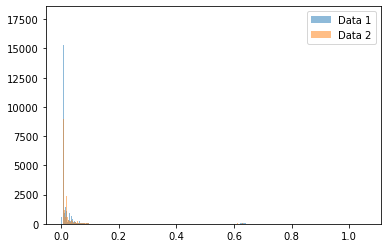

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 假设这是你的数据
data1 = summer  # 第一个数组
data2 = winter  # 第二个数组

# 绘制直方图
plt.hist(data1, bins=1000, alpha=0.5, label='Data 1')
plt.hist(data2, bins=1000, alpha=0.5, label='Data 2')

# 添加图例
plt.legend(loc='upper right')

# 显示图表
plt.show()